In [1]:
# Import all Librarys
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
%matplotlib inline

In [2]:
# Read CSV file.
df = pd.read_csv('results_exported.csv')
df.head()

,Unnamed: 0,reservation_no,room_no,total_nights,total_rate,avg_daily_rate,room_type,rate_type,booking_date,reservation_date,reservation_weekday,reservation_date_short
0,0,1,210,3,258.02,86.006667,Double,Best Available Rate,2016-06-28,2016-07-21,Thursday,"21, July"
1,1,1,210,3,258.02,86.006667,Double,Best Available Rate,2016-06-28,2016-07-22,Friday,"22, July"
2,2,1,210,3,258.02,86.006667,Double,Best Available Rate,2016-06-28,2016-07-23,Saturday,"23, July"
3,3,13,108,3,223.50,74.500000,Double,Best Available Rate,2016-06-28,2016-07-14,Thursday,"14, July"
4,4,13,108,3,223.50,74.500000,Double,Best Available Rate,2016-06-28,2016-07-15,Friday,"15, July"


In [3]:
#Count Total Rate & Room Type that matches
df1 = df.groupby(['total_nights', 'avg_daily_rate', 'room_type']).size().reset_index(name='reservation_date')
df1.head()

,total_nights,avg_daily_rate,room_type,reservation_date
0,1,0.0,Double,33
1,1,0.0,King,35
2,1,0.0,Premier King,11
3,1,0.0,Sweetheart King,8
4,1,0.0,Upscale Jacuzzi King,4


In [4]:
#Drop reservation_date Column
df2 = df1.drop(['reservation_date'], axis=1)
df2.head()

,total_nights,avg_daily_rate,room_type
0,1,0.0,Double
1,1,0.0,King
2,1,0.0,Premier King
3,1,0.0,Sweetheart King
4,1,0.0,Upscale Jacuzzi King


In [5]:
#Remove columns with zero and replace with NaN
df3 = df2.replace({"avg_daily_rate": 0},np.NaN)
#Drop rows with NaN
df4 = df3.dropna()
df4.head()

,total_nights,avg_daily_rate,room_type
6,1,10.00,Upscale King
7,1,12.65,Upscale King
8,1,16.43,King
9,1,25.00,Sweetheart King
10,1,25.32,King


In [6]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
df4 = pd.get_dummies(df4)
df4.head()
### END SOLUTION

,total_nights,avg_daily_rate,room_type_,room_type_Double,room_type_King,room_type_Premier King,room_type_Rubideaux Condo,room_type_Sweetheart King,room_type_Upscale Jacuzzi King,room_type_Upscale King
6,1,10.00,0,0,0,0,0,0,0,1
7,1,12.65,0,0,0,0,0,0,0,1
8,1,16.43,0,0,1,0,0,0,0,0
9,1,25.00,0,0,0,0,0,1,0,0
10,1,25.32,0,0,1,0,0,0,0,0


In [7]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = df4[['total_nights', 'room_type_King', 'room_type_Premier King', 'room_type_Sweetheart King', 'room_type_Upscale Jacuzzi King', 'room_type_Upscale King']]
y = df4["avg_daily_rate"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(2147, 6) (2147, 1)


# We compare the performance for each of the following models below.
# LinearRegression, Lasso, Ridge & ElasticNet


In [8]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [11]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

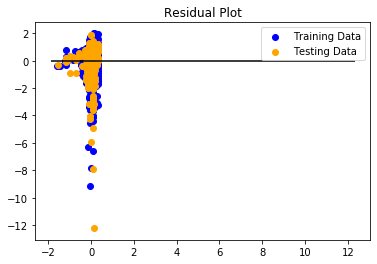

In [12]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [13]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2944941417118572, R2: 0.028040655964995276


In [14]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2965742181490956, R2: 0.02647884918323018


In [15]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2944941555360086, R2: 0.028040645585254875


In [16]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2954305171571403, R2: 0.027337586839966677


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
model = LinearRegression()

In [18]:
df4.head()

,total_nights,avg_daily_rate,room_type_,room_type_Double,room_type_King,room_type_Premier King,room_type_Rubideaux Condo,room_type_Sweetheart King,room_type_Upscale Jacuzzi King,room_type_Upscale King
6,1,10.00,0,0,0,0,0,0,0,1
7,1,12.65,0,0,0,0,0,0,0,1
8,1,16.43,0,0,1,0,0,0,0,0
9,1,25.00,0,0,0,0,0,1,0,0
10,1,25.32,0,0,1,0,0,0,0,0
